# TITULARES DE NOTICiAS

#Nombres:
1. Diana Marcela Gómez
2. Leonardo Hoyos
3. Diego Barreto

#Contexto:
Este conjunto de datos contiene titulares de noticias del año 2012 a 2018 obtenidos de HuffPost. Los titulares de noticias están categorizados en diferentes clases, dependiendo del texto que contienen.

#Objetivo:

Generar un modelo de clasificación que permita clasificar un titular de noticias dependiendo de su contenido, en una categoría específica.

In [57]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import plot_confusion_matrix

import plotly.graph_objs as go
from plotly.offline import iplot


from pprint import pprint

from nltk.corpus import stopwords

from gensim.models import LdaModel
from gensim.corpora import Dictionary

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from gensim.models import LdaModel 
from gensim.corpora import Dictionary
from pprint import pprint 
import numpy as np

from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords


import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display
import collections
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from pprint import pprint 
from textblob import TextBlob

from nltk.corpus import stopwords
from pprint import pprint
import numpy as np

from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

In [44]:
## Para instalar
!pip install textblob
!pip install vaderSentiment

In [45]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
vader = SentimentIntensityAnalyzer()

In [5]:
Datos= pd.read_json('Datos.json', lines=True, orient='records')

In [6]:
Datos

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


In [50]:
POLITICS = Datos[Datos['category'] == "POLITICS"]
POLITICS = POLITICS.sample(n=500, random_state=1)
FIFTY = Datos[Datos['category'] == "FIFTY"]
FIFTY = FIFTY.sample(n=500, random_state=1)
GOOD_NEWS = Datos[Datos['category'] == "GOOD NEWS"]
GOOD_NEWS = GOOD_NEWS.sample(n=500, random_state=1)
ARTS_CULTURE = Datos[Datos['category'] == "ARTS & CULTURE"]
ARTS_CULTURE = ARTS_CULTURE.sample(n=500, random_state=1)
ENVIRONMENT = Datos[Datos['category'] == "ENVIRONMENT"]
ENVIRONMENT = ENVIRONMENT.sample(n=500, random_state=1)
COLLEGE = Datos[Datos['category'] == "COLLEGE"]
COLLEGE = COLLEGE.sample(n=500, random_state=1)
LATINO_VOICES = Datos[Datos['category'] == "LATINO VOICES"]
LATINO_VOICES = LATINO_VOICES.sample(n=500, random_state=1)
CULTURE_ARTS = Datos[Datos['category'] == "CULTURE & ARTS"]
CULTURE_ARTS = CULTURE_ARTS.sample(n=500, random_state=1)
EDUCATION = Datos[Datos['category'] == "EDUCATION"]
EDUCATION = EDUCATION.sample(n=500, random_state=1)
WELLNESS = Datos[Datos['category'] == "WELLNESS"]
WELLNESS = WELLNESS.sample(n=500, random_state=1)
ENTERTAINMENT = Datos[Datos['category'] == "ENTERTAINMENT"]
ENTERTAINMENT = ENTERTAINMENT.sample(n=500, random_state=1)
TRAVEL = Datos[Datos['category'] == "TRAVEL"]
TRAVEL = TRAVEL.sample(n=500, random_state=1)
STYLE_BEAUTY = Datos[Datos['category'] == "STYLE & BEAUTY"]
STYLE_BEAUTY = STYLE_BEAUTY.sample(n=500, random_state=1)
PARENTING = Datos[Datos['category'] == "PARENTING"]
PARENTING = PARENTING.sample(n=500, random_state=1)
HEALTHY_LIVING = Datos[Datos['category'] == "HEALTHY LIVING"]
HEALTHY_LIVING = HEALTHY_LIVING.sample(n=500, random_state=1)
QUEER_VOICES = Datos[Datos['category'] == "QUEER VOICES"]
QUEER_VOICES = QUEER_VOICES.sample(n=500, random_state=1)
FOOD_DRINK = Datos[Datos['category'] == "FOOD & DRINK"]
FOOD_DRINK = FOOD_DRINK.sample(n=500, random_state=1)
BUSINESS = Datos[Datos['category'] == "BUSINESS"]
BUSINESS = BUSINESS.sample(n=500, random_state=1)
COMEDY = Datos[Datos['category'] == "COMEDY"]
COMEDY = COMEDY.sample(n=500, random_state=1)
SPORTS = Datos[Datos['category'] == "SPORTS"]
SPORTS = SPORTS.sample(n=500, random_state=1)
BLACK_VOICES = Datos[Datos['category'] == "BLACK VOICES"]
BLACK_VOICES = BLACK_VOICES.sample(n=500, random_state=1)
HOME_LIVING = Datos[Datos['category'] == "HOME & LIVING"]
HOME_LIVING = HOME_LIVING.sample(n=500, random_state=1)
PARENTS = Datos[Datos['category'] == "PARENTS"]
PARENTS = PARENTS.sample(n=500, random_state=1)
THE_WORLDPOST = Datos[Datos['category'] == "THE WORLDPOST"]
THE_WORLDPOST = THE_WORLDPOST.sample(n=500, random_state=1)
WEDDINGS = Datos[Datos['category'] == "WEDDINGS"]
WEDDINGS = WEDDINGS.sample(n=500, random_state=1)
WOMEN = Datos[Datos['category'] == "WOMEN"]
WOMEN = WOMEN.sample(n=500, random_state=1)
IMPACT = Datos[Datos['category'] == "IMPACT"]
IMPACT = IMPACT.sample(n=500, random_state=1)
DIVORCE = Datos[Datos['category'] == "DIVORCE"]
DIVORCE = DIVORCE.sample(n=500, random_state=1)
CRIME = Datos[Datos['category'] == "CRIME"]
CRIME = CRIME.sample(n=500, random_state=1)
MEDIA = Datos[Datos['category'] == "MEDIA"]
MEDIA = MEDIA.sample(n=500, random_state=1)
WEIRD_NEWS = Datos[Datos['category'] == "WEIRD NEWS"]
WEIRD_NEWS = WEIRD_NEWS.sample(n=500, random_state=1)
GREEN = Datos[Datos['category'] == "GREEN"]
GREEN = GREEN.sample(n=500, random_state=1)
WORLDPOST = Datos[Datos['category'] == "WORLDPOST"]
WORLDPOST = WORLDPOST.sample(n=500, random_state=1)
RELIGION = Datos[Datos['category'] == "RELIGION"]
RELIGION = RELIGION.sample(n=500, random_state=1)
STYLE = Datos[Datos['category'] == "STYLE"]
STYLE = STYLE.sample(n=500, random_state=1)
SCIENCE = Datos[Datos['category'] == "SCIENCE"]
SCIENCE = SCIENCE.sample(n=500, random_state=1)
WORLD_NEWS = Datos[Datos['category'] == "WORLD NEWS"]
WORLD_NEWS = WORLD_NEWS.sample(n=500, random_state=1)
TASTE = Datos[Datos['category'] == "TASTE"]
TASTE = TASTE.sample(n=500, random_state=1)
TECH = Datos[Datos['category'] == "TECH"]
TECH = TECH.sample(n=500, random_state=1)
MONEY = Datos[Datos['category'] == "MONEY"]
MONEY = MONEY.sample(n=500, random_state=1)
ARTS = Datos[Datos['category'] == "ARTS"]
ARTS = ARTS.sample(n=500, random_state=1)

In [51]:
datos = pd.concat([POLITICS, WELLNESS, ENTERTAINMENT, TRAVEL, STYLE_BEAUTY,
       PARENTING, HEALTHY_LIVING, QUEER_VOICES, FOOD_DRINK,
       BUSINESS, COMEDY, SPORTS, BLACK_VOICES, HOME_LIVING,
       PARENTS, THE_WORLDPOST, WEDDINGS, WOMEN, IMPACT, DIVORCE,
       CRIME, MEDIA, WEIRD_NEWS, GREEN, WORLDPOST, RELIGION,
       STYLE, SCIENCE, WORLD_NEWS, TASTE, TECH, MONEY, ARTS,
       FIFTY, GOOD_NEWS, ARTS_CULTURE, ENVIRONMENT, COLLEGE,
       LATINO_VOICES, CULTURE_ARTS, EDUCATION])

In [52]:
datos = pd.DataFrame(datos)

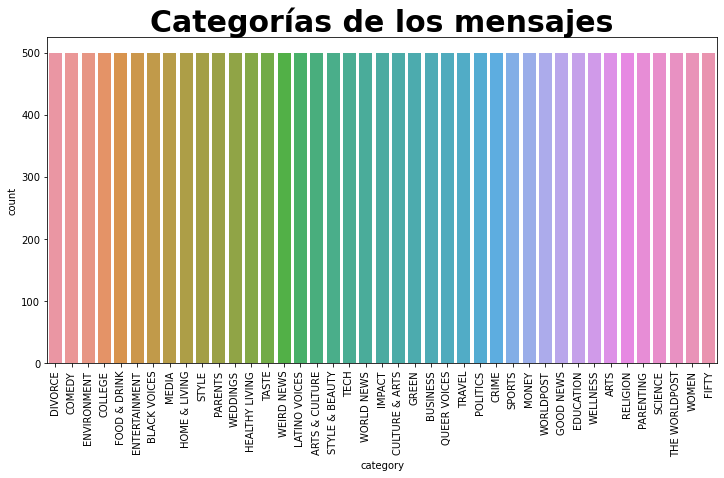

In [53]:
sns.countplot(x='category', data=datos, order=datos['category'].value_counts().index)
plt.title('Categorías de los mensajes', weight='bold', size=30, y=1)
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=90)
plt.show()

In [54]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\57314\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
stopwords_sp = stopwords.words('english')

In [59]:
stopwords = stopwords.words('english')

### Realizar la limpieza de los datos y guardarlos en la columna ''PP'

In [60]:
#Nueva columna 

spanishStemmer = SnowballStemmer("english")

def pre_procesado(m):
    m = m.lower()
    m = re.sub(r"[\W\d_]+", " ", m)
    m = [palabra for palabra in m.split() if palabra not in stopwords_sp]
    m = " ".join(m)
    m = [spanishStemmer.stem(palabra) for palabra in m.split()]
    m = " ".join(m)
    return (m)

datos['pp'] = datos['short_description'].apply(lambda m: pre_procesado(m))


In [61]:
# Matriz TF-IDF

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(datos['pp'].values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names())
tfidf_matrix.index = datos.index
tfidf_matrix=tfidf_matrix.T.round(3)
tfidf_matrix.columns = datos['category']

# ENTRENAMIENTO Y PRUEBA

In [62]:
train, test = train_test_split(datos, test_size=0.2, random_state=42)

print(f"Tenemos {datos.shape[0]} datos en total.")
print(f"El conjunto de datos de entrenamiento (train) tiene {train.shape[0]} datos.")
print(f"El conjunto de datos de prueba (test) tiene {test.shape[0]} datos.")

Tenemos 20500 datos en total.
El conjunto de datos de entrenamiento (train) tiene 16400 datos.
El conjunto de datos de prueba (test) tiene 4100 datos.


In [63]:
tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [64]:
X_train = tfidf_vect.fit_transform(train.short_description.values)
y_train = train.category.values

X_test = tfidf_vect.transform(test.short_description.values)
y_test = test.category.values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")

Tamaño de X_train (entrenamiento): (16400, 16564)
Tamaño de X_test (prueba): (4100, 16564)
Tamaño de y_train 16400 y tamaño de y_test 4100


# NUBE DE PALABRAS PARA LOS DATOS

In [65]:
!pip install wordcloud

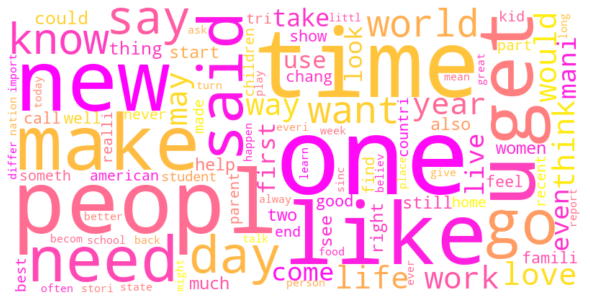

In [66]:
palabras = datos.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords).generate(palabras) 
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [67]:
img = PIL.Image.open("corazon.png")

In [68]:
mask = np.array(img)

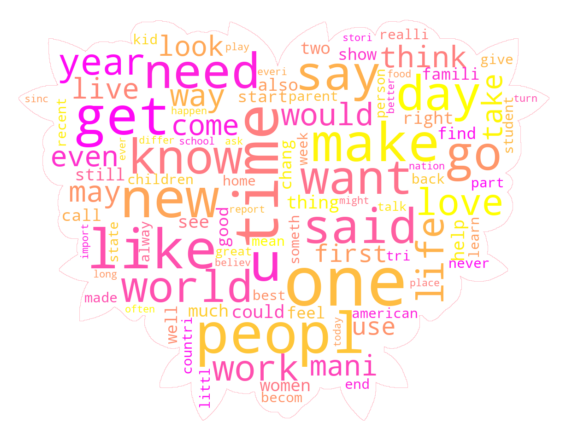

In [69]:
palabras = datos.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=1, contour_color='pink').generate(palabras) 

wordcloud.to_file("nlp_flor.png")

plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# POLITICS

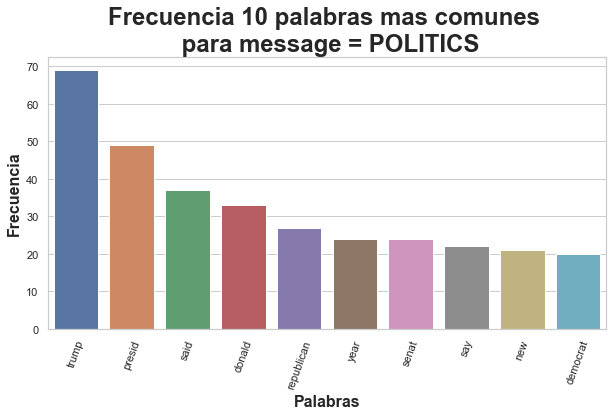

In [71]:
politics = datos[datos['category'] == 'POLITICS']
politics = collections.Counter(politics['pp'].str.cat(sep=" ").split()).most_common(10)

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x=[val[0] for val in politics], y=[val[1] for val in politics])
plt.xticks(rotation=70)
plt.title('Frecuencia 10 palabras mas comunes \n para message = POLITICS', weight='bold', size=24)
plt.ylabel('Frecuencia', weight='bold', size=16)
plt.xlabel('Palabras', weight='bold', size=16)
plt.show()

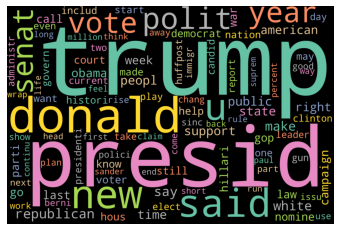

In [72]:
from wordcloud import WordCloud

attackWC = datos[datos['category'] == 'POLITICS']['pp'].values
attackWC=''.join(attackWC)

text=attackWC
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [73]:
img = PIL.Image.open("politica.png")

In [74]:
mask = np.array(img)

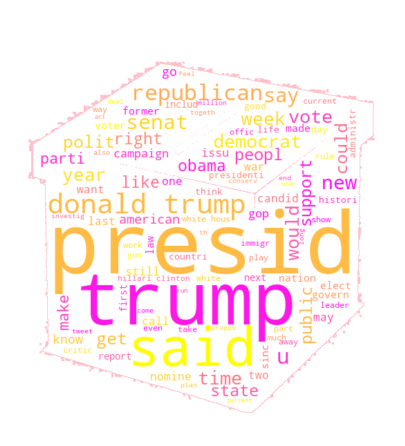

In [75]:
palabras = datos[datos['category'] == 'POLITICS']['pp'].str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=1, contour_color='pink').generate(palabras) 

wordcloud.to_file("nlp_flor.png")

plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# WELLNESS

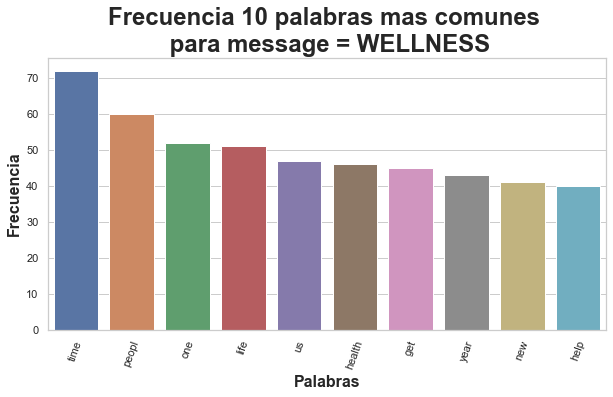

In [76]:
wellness = datos[datos['category'] == 'WELLNESS']
wellness = collections.Counter(wellness['pp'].str.cat(sep=" ").split()).most_common(10)

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x=[val[0] for val in wellness], y=[val[1] for val in wellness])
plt.xticks(rotation=70)
plt.title('Frecuencia 10 palabras mas comunes \n para message = WELLNESS', weight='bold', size=24)
plt.ylabel('Frecuencia', weight='bold', size=16)
plt.xlabel('Palabras', weight='bold', size=16)
plt.show()

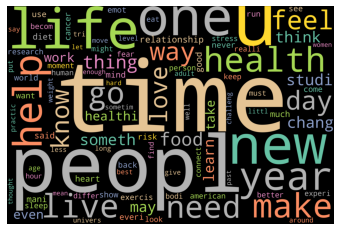

In [77]:
from wordcloud import WordCloud

attackWC = datos[datos['category'] == 'WELLNESS']['pp'].values
attackWC=''.join(attackWC)

text=attackWC
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [78]:
img = PIL.Image.open("arbol.png")

In [79]:
mask = np.array(img)

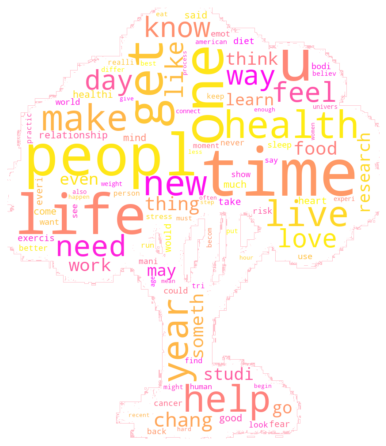

In [80]:
palabras = datos[datos['category'] == 'WELLNESS']['pp'].str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=1, contour_color='pink').generate(palabras) 

wordcloud.to_file("nlp_flor.png")

plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# ENTERTAINMENT

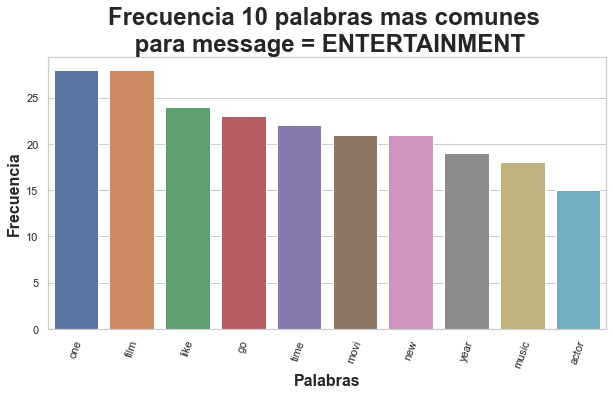

In [81]:
entertainment = datos[datos['category'] == 'ENTERTAINMENT']
entertainment = collections.Counter(entertainment['pp'].str.cat(sep=" ").split()).most_common(10)

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x=[val[0] for val in entertainment], y=[val[1] for val in entertainment])
plt.xticks(rotation=70)
plt.title('Frecuencia 10 palabras mas comunes \n para message = ENTERTAINMENT', weight='bold', size=24)
plt.ylabel('Frecuencia', weight='bold', size=16)
plt.xlabel('Palabras', weight='bold', size=16)
plt.show()

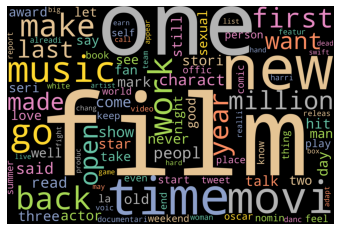

In [82]:
from wordcloud import WordCloud

attackWC = datos[datos['category'] == 'ENTERTAINMENT']['pp'].values
attackWC=''.join(attackWC)

text=attackWC
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [83]:
img = PIL.Image.open("radio.png")

In [84]:
mask = np.array(img)

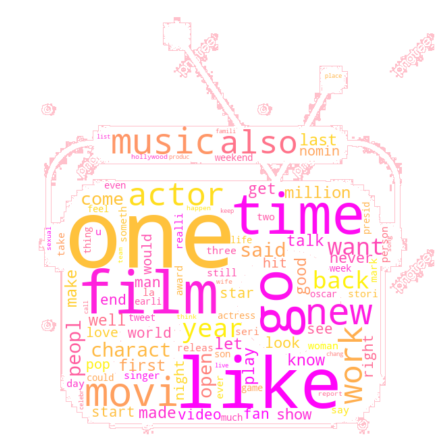

In [85]:
palabras = datos[datos['category'] == 'ENTERTAINMENT']['pp'].str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=1, contour_color='pink').generate(palabras) 

wordcloud.to_file("nlp_flor.png")

plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# STYLE & BEAUTY

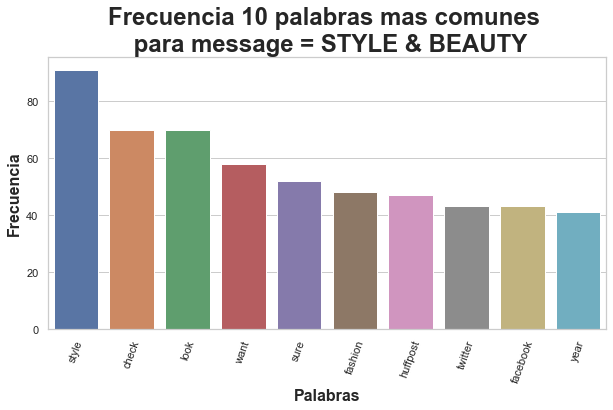

In [86]:
style = datos[datos['category'] == 'STYLE & BEAUTY']
style = collections.Counter(style['pp'].str.cat(sep=" ").split()).most_common(10)

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x=[val[0] for val in style], y=[val[1] for val in style])
plt.xticks(rotation=70)
plt.title('Frecuencia 10 palabras mas comunes \n para message = STYLE & BEAUTY', weight='bold', size=24)
plt.ylabel('Frecuencia', weight='bold', size=16)
plt.xlabel('Palabras', weight='bold', size=16)
plt.show()

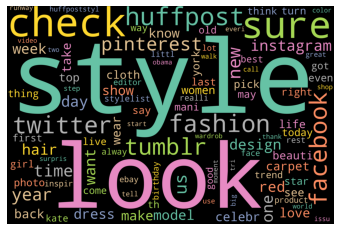

In [87]:
from wordcloud import WordCloud

attackWC = datos[datos['category'] == 'STYLE & BEAUTY']['pp'].values
attackWC=''.join(attackWC)

text=attackWC
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [88]:
img = PIL.Image.open("pelo.png")

In [89]:
mask = np.array(img)

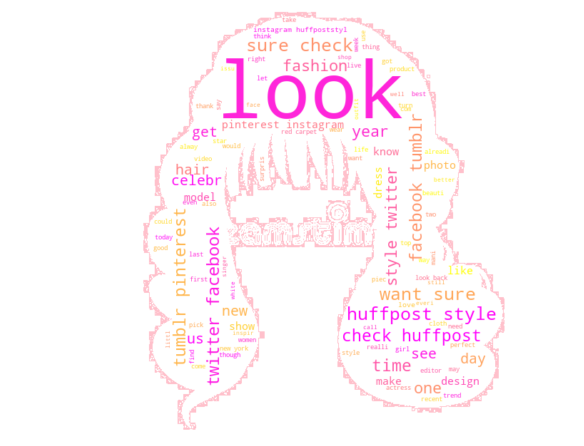

In [90]:
palabras = datos[datos['category'] == 'STYLE & BEAUTY']['pp'].str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=1, contour_color='pink').generate(palabras) 

wordcloud.to_file("nlp_flor.png")

plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# TRAVEL

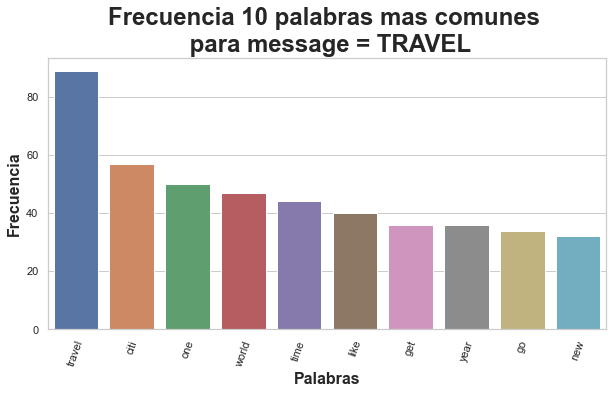

In [91]:
travel = datos[datos['category'] == 'TRAVEL']
travel = collections.Counter(travel['pp'].str.cat(sep=" ").split()).most_common(10)

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x=[val[0] for val in travel], y=[val[1] for val in travel])
plt.xticks(rotation=70)
plt.title('Frecuencia 10 palabras mas comunes \n para message = TRAVEL', weight='bold', size=24)
plt.ylabel('Frecuencia', weight='bold', size=16)
plt.xlabel('Palabras', weight='bold', size=16)
plt.show()

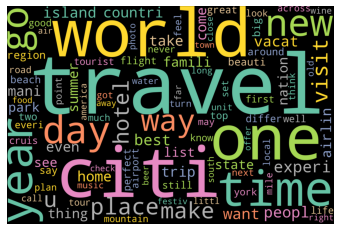

In [92]:
from wordcloud import WordCloud

attackWC = datos[datos['category'] == 'TRAVEL']['pp'].values
attackWC=''.join(attackWC)

text=attackWC
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [93]:
img = PIL.Image.open("maleta.png")

In [94]:
mask = np.array(img)

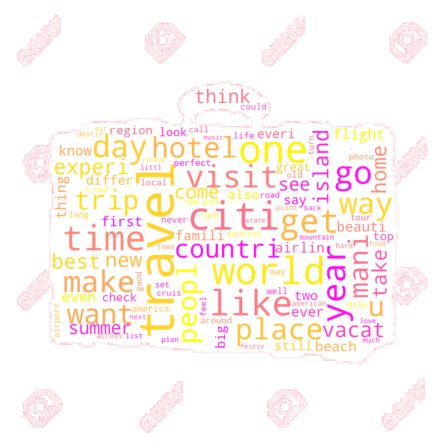

In [95]:
palabras = datos[datos['category'] == 'TRAVEL']['pp'].str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=1, contour_color='pink').generate(palabras) 

wordcloud.to_file("nlp_flor.png")

plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# ANÁLISIS DE SENTIMIENTO

In [96]:
pd.set_option('display.max_colwidth', None)

datos['sent_vader'] = datos['short_description'].apply(lambda val: vader.polarity_scores(val)['compound'])
datos['sent_textblob'] = datos['short_description'].apply(lambda val: TextBlob(val).sentiment.polarity)
datos[['short_description', 'sent_vader', 'sent_textblob']].head()

datos[['short_description', 'sent_vader']].sort_values('sent_vader').tail()

,short_description,sent_vader
132601,"You can have just about any kind of dessert at your bridal shower, but a cake is a fun and pretty way to top off the party. And it's a chance for you to get as creative as you like. Here are a few of our favorite bridal shower cake designs!",0.9824
105054,"Despite the traditional bustle we find ourselves in during the holiday season, let's pause for a moment and reflect on the last time someone shared joy with us. Whether someone shared a kind smile, held a door or offered a helping hand, it sure does feel good to recognize all of the joy.",0.9828
105695,"Thanksgiving and Christmastime is here and the charity of heart is up. We wish for you that love light your way, that charity guide your heart, and that the optimistic cautionary tale be that your loved ones remain safe.",0.9834
98384,"The place where I had felt most safe and loved as an infant, in my mother's arms, with my nose and mouth pressed to her skin, just above her heart and below her shoulder, that place was calling me back to say good-bye. Good-bye, good night, my sweet, beautiful mother. And thank you for loving me so well.",0.9836
118290,"I can't paint my own speedboating bear, but I can express my patriotism in the best way I know how. Courage? Fidelity? Fighting for justice? Pursuing freedom for all? Impacting those around me for the greater good with my creativity and tenacity? The answer is obviously Flag Cake.",0.9858


In [98]:
# Más positivo
maxs = datos.max()
maxs

category                                                                                                                     WORLDPOST
headline                                                           ‘We Are the Same Blood’: The Invisible Lives Of India’s Dalit Women
authors                                                      吉野ゆりえ, Contributor\nYurie Yoshino: Former Miss Japan, professional dancer
link                 https://www.huffingtonpost.comhttps://www.yourtango.com/experts/rick-clemons/national-coming-out-daythe-day-after
short_description                                                                                                                  🤔🤔🤔
date                                                                                                               2018-05-26 00:00:00
pp                                                                                                                                   ツ
sent_vader                                             

In [99]:
#Más negativo
min = datos.min()
min

category                                                                                       ARTS
headline                   "4% Rule" Serves as Guideline for Today's Retirees, But Use With Caution
authors                                                                                            
link                 https://www.huffingtonpost.com/entry/-6-content-marketing-stra_b_12061302.html
short_description                                                                                  
date                                                                            2012-01-28 00:00:00
pp                                                                                                 
sent_vader                                                                                  -0.9846
sent_textblob                                                                                  -1.0
dtype: object

En tu despedida de soltera puedes tener casi cualquier tipo de postre, pero una tarta es una forma divertida y bonita de rematar la fiesta. Y es una oportunidad para ser tan creativa como quieras. Aquí tienes algunos de nuestros diseños favoritos de tartas para despedidas de soltera. (Puntaje: 0.9824)

# MODELOS SUPERVISADOS

In [100]:
# Inicializar los clasificadores
nb = MultinomialNB()
logreg = LogisticRegression(class_weight='balanced')
svm = LinearSVC(class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced')

In [101]:
# Entrenamos los modelos
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train);

In [102]:
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [104]:
#### Exactitud

print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):>15.2f}")
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):>23.2f}")
print(f"Árbol de decisión: {accuracy_score(y_test, y_pred_dt):>9.2f}")

Naive Bayes:            0.27
Regresión Logística:    0.29
SVM:                    0.27
Árbol de decisión:      0.19


In [105]:
print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print()

print("Regresión Logística")
print(classification_report(y_test, y_pred_logreg))
print()

print("SVM")
print(classification_report(y_test, y_pred_svm))
print()

print("Árbol de decisión")
print(classification_report(y_test, y_pred_dt))
print()


Naive Bayes
                precision    recall  f1-score   support

          ARTS       0.37      0.06      0.11       109
ARTS & CULTURE       0.38      0.12      0.18        98
  BLACK VOICES       0.52      0.13      0.21       126
      BUSINESS       0.30      0.20      0.24       103
       COLLEGE       0.46      0.23      0.31       109
        COMEDY       0.33      0.15      0.20        96
         CRIME       0.50      0.43      0.46       109
CULTURE & ARTS       0.25      0.28      0.27        95
       DIVORCE       0.27      0.64      0.38        92
     EDUCATION       0.38      0.63      0.47        90
 ENTERTAINMENT       0.18      0.06      0.09        96
   ENVIRONMENT       0.32      0.31      0.32       105
         FIFTY       0.19      0.13      0.16       104
  FOOD & DRINK       0.42      0.38      0.40       110
     GOOD NEWS       0.19      0.08      0.11        86
         GREEN       0.27      0.13      0.18       100
HEALTHY LIVING       0.25      0.05

In [106]:
%config InlineBackend.figure_format = 'svg'

### Predicciones

In [107]:
nuevos = ["CNNs Jim Acosta discusses with Jim Avlon and Margaret Hoover former President Donald Trump's remarks about Kentucky Derby winner Medina Spirit. The racehorse tested positive for elevated levels of betamethasone, a corticosteroid. Trump said that now horses are addicted." ]
nuevos_trans = tfidf_vect.transform(nuevos)
nb.predict(nuevos_trans)

# nb.predict_proba(nuevos_trans)

array(['POLITICS'], dtype='<U14')

In [108]:
logreg.predict(nuevos_trans)

array(['POLITICS'], dtype=object)

In [109]:
svm.predict(nuevos_trans)


array(['POLITICS'], dtype=object)

In [110]:
dt.predict(nuevos_trans)

array(['TECH'], dtype=object)

# MODELO NO SUPERVISADO (LDA)

In [111]:
vect = CountVectorizer(min_df=20, max_df=0.2, stop_words='english', 
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
X = vect.fit_transform(datos.pp)
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
ldamodel = gensim.models.LdaMulticore(corpus=corpus, id2word=id_map, passes=2,
                                               random_state=5, num_topics=5, workers=2)

In [112]:
for idx, topic in ldamodel.print_topics(-1):
    print("Clase: {} \nWords: {}".format(idx, topic))
    print("\n")

Clase: 0 
Words: 0.010*"like" + 0.008*"state" + 0.008*"educ" + 0.008*"year" + 0.008*"think" + 0.006*"make" + 0.006*"said" + 0.006*"anoth" + 0.006*"week" + 0.006*"peopl"


Clase: 1 
Words: 0.015*"new" + 0.011*"world" + 0.010*"look" + 0.009*"week" + 0.007*"women" + 0.007*"love" + 0.006*"countri" + 0.006*"like" + 0.005*"littl" + 0.005*"report"


Clase: 2 
Words: 0.014*"year" + 0.011*"time" + 0.009*"day" + 0.009*"mani" + 0.009*"chang" + 0.008*"life" + 0.008*"need" + 0.008*"make" + 0.006*"want" + 0.006*"way"


Clase: 3 
Words: 0.011*"day" + 0.011*"peopl" + 0.010*"want" + 0.010*"know" + 0.010*"thing" + 0.008*"live" + 0.008*"like" + 0.007*"new" + 0.007*"year" + 0.007*"love"


Clase: 4 
Words: 0.017*"time" + 0.012*"year" + 0.010*"new" + 0.009*"like" + 0.009*"make" + 0.007*"peopl" + 0.007*"citi" + 0.006*"art" + 0.006*"school" + 0.006*"student"




In [113]:
frase = "CNNs Jim Acosta discusses with Jim Avlon and Margaret Hoover former President Donald Trump's remarks about Kentucky Derby winner Medina Spirit. The racehorse tested positive for elevated levels of betamethasone, a corticosteroid. Trump said that now horses are addicted." 

In [114]:
def topic_distribution(string_input):
    string_input = [string_input]
    X = vect.transform(string_input)
 
    corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
 
    output = list(ldamodel[corpus])[0]
 
    return output
  
 
 
topic_distribution(frase)

[(0, 0.029322922),
 (1, 0.8839034),
 (2, 0.028845085),
 (3, 0.029107045),
 (4, 0.028821616)]

In [115]:
def prediccion_clase(my_document):
    string_input = [my_document]
    X = vect.transform(string_input)
    corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
    output = list(ldamodel[corpus])[0]
    topics = sorted(output,key=lambda x:x[1],reverse=True)
    return topics[0][0]

In [116]:
prediccion_clase(frase)

1

In [117]:
! pip install pyLDAvis
! pip install pyLDAvis --upgrade

Requirement already up-to-date: pyLDAvis in c:\users\57314\anaconda3\lib\site-packages (3.3.1)


In [118]:
import pyLDAvis.gensim_models
from gensim.models import LdaModel 
from gensim.corpora import Dictionary
from pprint import pprint

In [121]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    return texto

datos['Pre-Processed'] = datos['pp'].apply(lambda texto: pre_procesado(texto))

,category,headline,authors,link,short_description,date,pp,sent_vader,sent_textblob,Pre-Processed
37216,POLITICS,Why Trump's Contempt For The Emoluments Clause Matters,Jason Linkins and Christina Wilkie,https://www.huffingtonpost.com/entry/trump-emoluments-clause_us_58794852e4b09281d0eaf212,Foreign governments could still line his pockets in lots of ways.,2017-01-15,foreign govern could still line pocket lot way,0.0000,-0.125,"[foreign, govern, could, still, line, pocket, lot, way]"
67203,POLITICS,Carly Fiorina Reveals She's Been Called 'Bimbo' And 'Bitch' On The Campaign Trail,"Scott Conroy, Jon Strauss, and Sam Wilkes",https://www.huffingtonpost.com/entry/carly-fiorina-gender-discrimination_us_56b89b7fe4b08069c7a7e0d6,The lone female Republican presidential candidate tells HuffPost she still faces gender discrimination regularly.,2016-02-08,lone femal republican presidenti candid tell huffpost still face gender discrimin regular,-0.2732,0.000,"[lone, femal, republican, presidenti, candid, tell, huffpost, still, face, gender, discrimin, regular]"
98989,POLITICS,Study: Why Some School Principals In Florida Still Spank Students,Rebecca Klein,https://www.huffingtonpost.com/entry/university-of-florida-corporal-punishment_n_6647384.html,,2015-02-11,,0.0000,0.000,[]
73737,POLITICS,These Children Are Suing The Federal Government Over Climate Change,,https://www.huffingtonpost.comhttp://thinkprogress.org/climate/2015/11/25/3725052/climate-change-children-lawsuit/,Xiuhtezcatl Tonatiuh Martinez is not your average 15 year old.,2015-11-25,xiuhtezcatl tonatiuh martinez averag year old,0.0000,-0.025,"[xiuhtezcatl, tonatiuh, martinez, averag, year, old]"
11613,POLITICS,Mistrial Declared In Bob Menendez Bribery Trial,Mollie Reilly,https://www.huffingtonpost.com/entry/bob-menendez-mistrial_us_5a0dd3d5e4b0c0b2f2f8ae46,"The Democratic senator was indicted on 14 charges, including public corruption.",2017-11-16,democrat senat indict charg includ public corrupt,-0.2732,0.000,"[democrat, senat, indict, charg, includ, public, corrupt]"


In [122]:
# Crear una represantación de los documentos en forma de diccionario
dictionary = Dictionary(datos['Pre-Processed'].values)

# Filtrar palabras muy frecuentes o infrecuentes
dictionary.filter_extremes(no_below=5, no_above=0.5) 

# Corpus
corpus = [dictionary.doc2bow(text) for text in datos['Pre-Processed'].values]

# Entrenar el modelo
model = LdaModel(corpus = corpus, id2word = dictionary, num_topics = 5, passes=500)

In [123]:
model.print_topics(num_words=9)

[(0,
  '0.016*"new" + 0.010*"like" + 0.009*"citi" + 0.008*"look" + 0.008*"trump" + 0.007*"said" + 0.007*"york" + 0.006*"one" + 0.006*"hous"'),
 (1,
  '0.017*"get" + 0.015*"time" + 0.012*"day" + 0.010*"make" + 0.010*"one" + 0.010*"go" + 0.010*"want" + 0.009*"know" + 0.008*"love"'),
 (2,
  '0.012*"one" + 0.009*"work" + 0.009*"thing" + 0.009*"like" + 0.008*"mani" + 0.008*"make" + 0.008*"life" + 0.007*"new" + 0.007*"year"'),
 (3,
  '0.025*"year" + 0.020*"student" + 0.014*"week" + 0.014*"school" + 0.011*"last" + 0.011*"teacher" + 0.010*"colleg" + 0.008*"month" + 0.008*"day"'),
 (4,
  '0.016*"educ" + 0.010*"peopl" + 0.010*"state" + 0.009*"school" + 0.008*"countri" + 0.008*"nation" + 0.008*"u" + 0.006*"chang" + 0.006*"american"')]

In [124]:
lda_display = pyLDAvis.gensim_models.prepare(model, corpus, dictionary, sort_topics=True)
pyLDAvis.display(lda_display)